In [35]:
import pandas as pd


### NLP : Sentiment analysis with VADER

In [2]:
%%capture
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

In [31]:
#!unzip '/content/sentiment labelled sentences.zip'

In [42]:
import os
import pandas as pd

# Specify the path to the folder
folder_path = './sentiment labelled sentences/'

# List all files in the folder
files = os.listdir(folder_path)

# Filter only .txt files
txt_files = [file for file in files if file.endswith('.txt') and file != 'readme.txt']

# Initialize empty DataFrames
dfs = []

# Iterate over the list of .txt files
for idx, txt_file in enumerate(txt_files):
    # Construct the full path to each file
    file_path = os.path.join(folder_path, txt_file)
    
    # Read the file and create a DataFrame
    df = pd.read_csv(file_path, delimiter='\t', names=['review','labelled_sentiment'])  # Change delimiter if needed
    # Append the DataFrame to the list with a descriptive name
    dfs.append(df)

# Assign each DataFrame to respective variable names
df1, df2, df3 = dfs

# Now you can work with df1, df2, and df3 as needed
# Example: Print the first few rows of each DataFrame
print("DataFrame 1:")
print(df1.head())

print("\nDataFrame 2:")
print(df2.head())

print("\nDataFrame 3:")
print(df3.head())


DataFrame 1:
                                              review  labelled_sentiment
0  So there is no way for me to plug it in here i...                   0
1                        Good case, Excellent value.                   1
2                             Great for the jawbone.                   1
3  Tied to charger for conversations lasting more...                   0
4                                  The mic is great.                   1

DataFrame 2:
                                              review  labelled_sentiment
0  A very, very, very slow-moving, aimless movie ...                   0
1  Not sure who was more lost - the flat characte...                   0
2  Attempting artiness with black & white and cle...                   0
3       Very little music or anything to speak of.                     0
4  The best scene in the movie was when Gerardo i...                   1

DataFrame 3:
                                              review  labelled_sentiment
0         

In [43]:
#df1 = pd.read_csv('/sentiment labelled sentences/amazon_cells_labelled.txt',delimiter='\t',names=['review','labelled_sentiment'])
df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)
df.info()
# O- negative 1- positive

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review              2748 non-null   object
 1   labelled_sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review              2748 non-null   object
 1   labelled_sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [45]:
df['labelled_sentiment'].unique()

array([0, 1], dtype=int64)

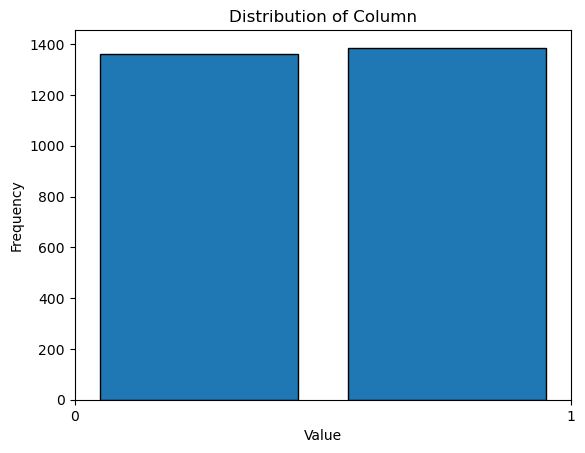

In [46]:
import matplotlib.pyplot as plt
# Plot the distribution
plt.hist(df['labelled_sentiment'], bins=[0, 0.5, 1], edgecolor='black', density=False, rwidth=0.8)  # Define bins for 0 and 1
plt.title('Distribution of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks([0, 1])  # Set ticks for the x-axis
plt.show()

In [14]:
!#pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [47]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [48]:
#use lambda function to apply analyser score function for review column
df['vader_sentiment_score'] = df['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df.head()

,review,labelled_sentiment,vader_sentiment_score
0,So there is no way for me to plug it in here i...,0,-0.3535
1,"Good case, Excellent value.",1,0.8402
2,Great for the jawbone.,1,0.6249
3,Tied to charger for conversations lasting more...,0,-0.6145
4,The mic is great.,1,0.6249


In [52]:
#Mapping scores based on sentiment
df['vader_sentiment'] = df['vader_sentiment_score'].map(lambda x:int(1) if x> 0.05 else int(0) if x <-0.05 else int(2))

In [53]:
#Assign sentiments based oncalculated vader_sentiment
df.loc[df['vader_sentiment']==1, "vader_sentiment_label"] = "positive"
df.loc[df['vader_sentiment']==2, "vader_sentiment_label"] = "neutral"
df.loc[df['vader_sentiment']==0, "vader_sentiment_label"] = "negative"
df.head()

,review,labelled_sentiment,vader_sentiment_score,vader_sentiment,vader_sentiment_label
0,So there is no way for me to plug it in here i...,0,-0.3535,0,negative
1,"Good case, Excellent value.",1,0.8402,1,positive
2,Great for the jawbone.,1,0.6249,1,positive
3,Tied to charger for conversations lasting more...,0,-0.6145,0,negative
4,The mic is great.,1,0.6249,1,positive


In [54]:
df['vader_sentiment_label'].value_counts()
df['vader_sentiment'].value_counts()

vader_sentiment
1    1371
0     785
2     592
Name: count, dtype: int64

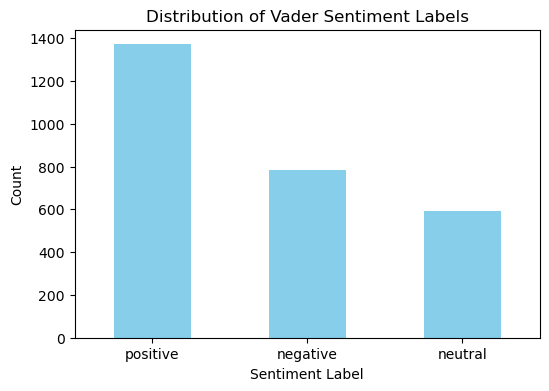

In [55]:

# Plot the distribution
plt.figure(figsize=(6, 4))
df['vader_sentiment_label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Vader Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()